<a href="https://colab.research.google.com/github/habhishek/nlp_samples/blob/main/Natural_Laguage_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Processing Natural Language Data

* Tokenization (splitting into individual words)
* To lowercase: She -> she
* Removing "stopwords" - frequently occurring words that tend to contain relatively little distinctive meaning - the, at, which - some stopwords with negation, probably have more meaning like - didn't shouldn't
* Removing punctuation
* Stemming - truncation of words downt to their stem (house -> hous; housing -> hous) OR
  Lemmatization - also has a reference dictionary for more sophisticated and maaningful transformations (are -> be; housing -> house)
* Handling *n-grams*: [new, york] -> [new_york]

#### Load Dependencies

In [1]:

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

import spacy # for a lemmatization example

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Load Data

In [2]:
from nltk.corpus import gutenberg

In [3]:
# tokenize sentence and words in one shot
gberg_sents = gutenberg.sents()

gberg_sents[0:6]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

Iteratively preprocess the sentence

In [5]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [7]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

**Remove Stopwords and punctuation**

In [9]:
stpwords = stopwords.words('english') + list(string.punctuation)

In [10]:
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwords]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

**stem words**

In [12]:
stemer = PorterStemmer()

In [15]:
[stemer.stem(w.lower()) for w in gberg_sents[4] if w.lower() not in stpwords]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

**a lemmatization example**

In [16]:
nlp = spacy.load('en_core_web_sm')

In [17]:
gutenberg.raw()[291:477]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [18]:
spacy_doc = nlp(gutenberg.raw()[291:477])

In [19]:
[w.lemma_ for w in spacy_doc]

['-PRON-',
 'be',
 'the',
 'young',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 '\n',
 'indulgent',
 'father',
 ';',
 'and',
 'have',
 ',',
 'in',
 'consequence',
 'of',
 '-PRON-',
 'sister',
 "'s",
 'marriage',
 ',',
 '\n',
 'be',
 'mistress',
 'of',
 '-PRON-',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

**handle bigram collocations**

In [24]:
phrases = Phrases(gberg_sents) # train detector
# look for pairs of words co located

In [21]:
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences

In [25]:
bigram.phrasegrams # output count and score of each bigram
# dictionary of tuples - eg - (very early)
# summary score representing how often this pair occur together
# relative to how often they occur apart from each other
# high - often occur together

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

In [26]:
tokenized_sentence = "Jon lives in New York City".split()

In [27]:
tokenized_sentence

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [28]:
bigram[tokenized_sentence]

['Jon', 'lives', 'in', 'New_York', 'City']

#### Preprocess the corpus

In [29]:
lower_sents = []
for s in gberg_sents:
  lower_sents.append([w.lower() for w in s if w.lower() not in list(string.punctuation)])

In [30]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [31]:
lower_bigram = Phraser(Phrases(lower_sents))

In [32]:
lower_bigram.phrasegrams

{(b'two', b'daughters'): (19, 11.080802900992637),
 (b'her', b'sister'): (201, 16.93971298099339),
 (b'very', b'early'): (25, 10.516998773665177),
 (b'her', b'mother'): (253, 10.70812618607742),
 (b'long', b'ago'): (38, 59.226442015336005),
 (b'more', b'than'): (562, 28.529926612065935),
 (b'had', b'been'): (1260, 21.583193129694834),
 (b'an', b'excellent'): (58, 37.41859680854167),
 (b'sixteen', b'years'): (15, 131.42913000977515),
 (b'miss', b'taylor'): (48, 420.4340982546865),
 (b'mr', b'woodhouse'): (132, 104.19907841850323),
 (b'very', b'fond'): (30, 24.185726346489627),
 (b'passed', b'away'): (25, 11.751473221742694),
 (b'too', b'much'): (177, 30.36309017383541),
 (b'did', b'not'): (977, 10.846196223896685),
 (b'any', b'means'): (28, 14.294148100212627),
 (b'after', b'dinner'): (22, 18.60737125272944),
 (b'mr', b'weston'): (162, 91.63290824201266),
 (b'five', b'years'): (42, 37.66428596665674),
 (b'years', b'old'): (176, 48.599094446190286),
 (b'seven', b'years'): (53, 50.3345604

In [33]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))

In [34]:
lower_bigram.phrasegrams

{(b'afar', b'off'): (52, 108.14220347465505),
 (b'burnt', b'offering'): (184, 297.524653753951),
 (b'burnt', b'offerings'): (86, 299.15702343127646),
 (b'buster', b'bear'): (142, 479.87410772225826),
 (b'captain', b'benwick'): (56, 241.49037086312987),
 (b'captain', b'wentworth'): (196, 529.8756608388247),
 (b'charles', b'hayter'): (33, 92.03437785214481),
 (b'chief', b'priests'): (65, 116.31947753846512),
 (b'colonel', b'brandon'): (132, 1313.0078125),
 (b'couldn', b't'): (89, 171.76138536935215),
 (b'cut', b'off'): (217, 129.60290535032792),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'de', b'grey'): (77, 603.2109624246722),
 (b'didn', b't'): (180, 220.51081560283686),
 (b'doesn', b't'): (53, 106.2634985949418),
 (b'don', b't'): (830, 250.30957446808512),
 (b'dr', b'bull'): (65, 680.7870294599019),
 (b'dr', b'middleton'): (40, 162.73103819257668),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'farmer', b'brown'): (100, 386.05179596892236),
 (b'father', b'brown'): (207, 91.

In [35]:
clean_sents = []
for s in lower_sents:
  clean_sents.append(lower_bigram[s])

In [36]:
clean_sents[0:9]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [37]:
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

### Run word2vec

In [38]:
model = Word2Vec(sentences=clean_sents, size=64,
                 sg=1, window=10, iter=5,
                 min_count=10, workers=4)


In [39]:
model.wv['dog']

array([ 0.05169619, -0.10078546, -0.13426621, -0.04798188, -0.19994764,
        0.5137903 ,  0.16287848,  0.614243  ,  0.08998039,  0.04853803,
       -0.36329973,  0.0875819 , -0.29595336, -0.40371817,  0.16482493,
       -0.20448275,  0.12435773, -0.54756606,  0.11913769,  0.09558579,
       -0.30165502, -0.44268718, -0.23397258,  0.17490636,  0.1835278 ,
       -0.14021057,  0.07286675, -0.1751836 ,  0.24263856, -0.17978472,
       -0.3454456 , -0.4780333 ,  0.27112454, -0.0196275 ,  0.79323053,
        0.26387212,  0.5199263 ,  0.00978427, -0.48890847,  0.40334144,
       -0.08324606,  0.2905335 ,  0.00554412,  0.0259849 , -0.24525785,
        0.22565809,  0.03944605, -0.33456826, -0.05001116,  0.22007623,
        0.14953224, -0.44326246,  0.04890911, -0.13428417, -0.47526833,
       -0.4285036 , -0.21254708, -0.3701851 ,  0.00858493, -0.03003061,
       -0.08089593, -0.19553317,  0.23988253,  0.1253217 ], dtype=float32)

In [40]:
model.wv.most_similar('dog')

[('puppy', 0.8096425533294678),
 ('tiger', 0.7592644691467285),
 ('cage', 0.7584555149078369),
 ('ginger', 0.7510074973106384),
 ('brahmin', 0.747372031211853),
 ('cow', 0.7367017865180969),
 ('fox', 0.7365981936454773),
 ('pet', 0.7351750135421753),
 ('camel', 0.7252124547958374),
 ('broth', 0.7222755551338196)]

In [41]:
model.wv.most_similar('brahmin')

[('angrily', 0.8543622493743896),
 ('tiger', 0.8539556264877319),
 ('mammy', 0.8492411971092224),
 ('epaminondas', 0.8200662136077881),
 ('nodding', 0.8192306756973267),
 ('hatter', 0.8053230047225952),
 ('deer', 0.8049428462982178),
 ('duchess', 0.8012334704399109),
 ("'--", 0.7957229614257812),
 ('jury', 0.7877632975578308)]

In [44]:
model.wv.most_similar('brahmin')

[('angrily', 0.8543622493743896),
 ('tiger', 0.8539556264877319),
 ('mammy', 0.8492411971092224),
 ('epaminondas', 0.8200662136077881),
 ('nodding', 0.8192306756973267),
 ('hatter', 0.8053230047225952),
 ('deer', 0.8049428462982178),
 ('duchess', 0.8012334704399109),
 ("'--", 0.7957229614257812),
 ('jury', 0.7877632975578308)]

In [46]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])

[('wife', 0.7759866714477539),
 ('daughter', 0.764331579208374),
 ('sister', 0.7638674974441528),
 ('mother', 0.7630479335784912),
 ('husband', 0.7589226961135864),
 ('daughters', 0.6961997151374817),
 ('handmaid', 0.6849231719970703),
 ('sarah', 0.6774389147758484),
 ('tamar', 0.6753703951835632),
 ('loved', 0.6750472784042358)]

#### Reduce the word vector dimension

In [47]:
tsne = TSNE(n_components=2, n_iter=1000)

In [48]:
X_2d = tsne.fit_transform(model.wv[model.wv.vocab])

In [50]:
coords_df = pd.DataFrame(X_2d, columns = ['X', 'Y'])
coords_df['token'] = model.wv.vocab.keys()

coords_df.head()

,X,Y,token
0,60.037415,-23.548174,emma
1,30.691751,44.882671,by
2,59.740200,-20.653265,jane
3,21.190617,11.195393,volume
4,40.091583,22.966208,i


### Visualize

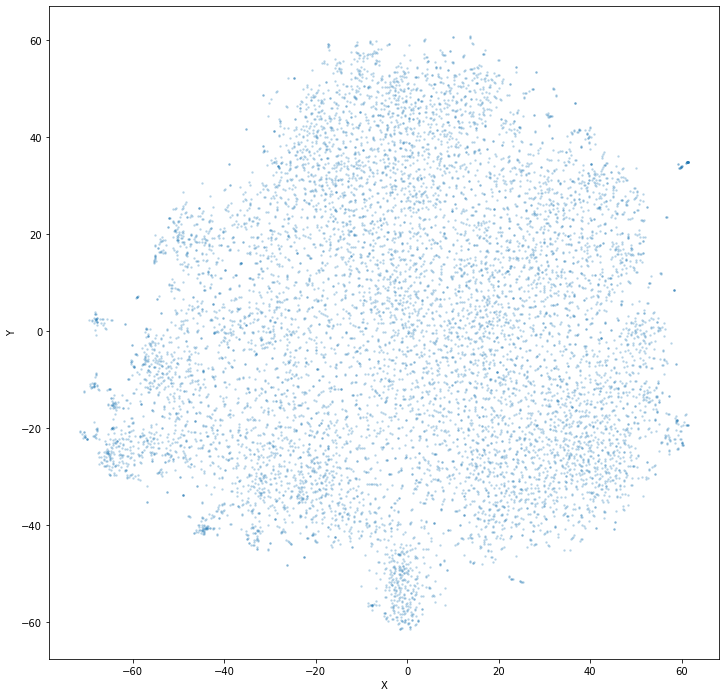

In [51]:
_ = coords_df.plot.scatter('X', 'Y', figsize=(12,12),
                           marker='.', s=10, alpha=0.2)

In [52]:
output_notebook()

In [53]:
subset_df = coords_df.sample(n=5000)

In [55]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.X, y=subset_df.X, text=subset_df.token)

In [56]:
show(p)

In [58]:
coords_df.loc[coords_df['token']=='dog']

,X,Y,token
4865,31.948355,37.381493,dog


In [59]:
coords_df.loc[coords_df['token']=='brahmin']

,X,Y,token
8825,33.783958,37.177208,brahmin
